<a href="https://colab.research.google.com/github/IvanIri/Aprendizaje-Automatico/blob/main/TP1_AA1_Iv%C3%A1n_Irigoyen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TP1 AA1

**Iván Irigoyen**

## Indicaciones básicas

0) Debe usar este notebook como template para su entrega. Haga una copia y comience a completar las consignas.

1) Cada uno debe completar las consignas indicadas en este notebook.

2)
3) No pueden repetir el mismo dataset que ya haya definido un compañero.

4) copias explícitas de secciones enteras del trabajo de otro será penalizado disminuyendo su puntuación.

5) No se olvide de añadir las fuentes de inspiración de su código (blogs, prompts de chatgpt o similar).

6) Además de todo el código que agregue, es importante que sepa interpretarlo. Agregue texto explicativo en cada sección. Esto le ayudará al momento del coloquio / parcial

7) Revise las fecha límite de entrega de este trabajo

# ENTREGA

* En el foro destinado a la tarea debe postear al menos tres veces:
  - La primera vez para indicar el dataset elegido
  - Una segunda vez para postear su entrega
  - Una tercera vez para brindar feedback a alguien más en el foro.
  - Puede comentar más de un posteo de sus compañeros siempre y cuando el intercambio sea respetuoso y fructífero.
* Deben postear como solución un enlace a su notebook colab público y también un enlace al mismo notebook alojado en su repositorio GitHub.
* Debe sumar el enlace a un video donde muestre su solución y explique lo realizado. Duración máxima: 5 minutos. Puede grabarse a Ud. mismo usando una sesión de zoom y grabar localmente. Puede subir el video a su youtube personal como privado o Unlisted.
* Enlaces no accesibles o enlaces erróneos es igual a determinar que la tarea no ha sido entregada. Corrobore la viabilidad de los enlaces que postea.


#**Tarea: Aplicación de Regresión Lineal y Análisis de Importancia de Variables**  
**Objetivo**: Aplicar un modelo de regresión lineal a un dataset de su elección, evaluar su rendimiento e identificar las variables más relevantes para la predicción.

---

# **Instrucciones**:

#1. **Selección del Dataset**  
   - Elijan un dataset de UCI ML Repository del siguiente enlace: https://archive.ics.uci.edu/datasets/?Task=Regression&skip=0&take=10&sort=desc&orderBy=NumHits&search=  
   - Requisitos:  
     - Debe tener al menos 4 variables numéricas continuas (1 target, 3 o más features).  
     - Idealmente, que las features tengan distintas escalas o unidades ( no excluyente).
     - Revisar en el foro de la tarea que dicho dataset no haya sido ya elegido por otra persona.
     - Postee en el foro de la tarea el dataset que eligió. Continue al siguiente punto.  



## Resolución:

In [14]:
# Conversion del archivo a formato csv

import pandas as pd
"""
columnas = [
    "mpg", "cylinders", "displacement", "horsepower",
    "weight", "acceleration", "model_year", "origin", "car_name"
]

df = pd.read_csv("auto-mpg.data", delim_whitespace= True, names= columnas, na_values="?", quotechar= '"')

df.to_csv("auto-mpg.csv", index = False)

"""

'\ncolumnas = [\n    "mpg", "cylinders", "displacement", "horsepower",\n    "weight", "acceleration", "model_year", "origin", "car_name"\n]\n\ndf = pd.read_csv("auto-mpg.data", delim_whitespace= True, names= columnas, na_values="?", quotechar= \'"\')\n\ndf.to_csv("auto-mpg.csv", index = False)\n\n'

In [15]:
# Traer el dataset con formato csv.

url = "https://raw.githubusercontent.com/IvanIri/Aprendizaje-Automatico/refs/heads/main/auto-mpg.csv"

autos_mpg = pd.read_csv(url, names= columnas, na_values="?", skiprows= 1)

autos_mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino



## 2. **Análisis exploratorio (previo al modelado)**  
   - Describan las variables (media, distribución, outliers).  
   - Visualizen:  
     - Histogramas o boxplots para ver distribuciones.  
     - Gráficos de dispersión (scatterplots) entre features y target.  
   - **Pregunta clave**: ¿Qué relaciones lineales preliminares observan?  


## Resolución:

In [16]:
# importo las librerias necesarias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

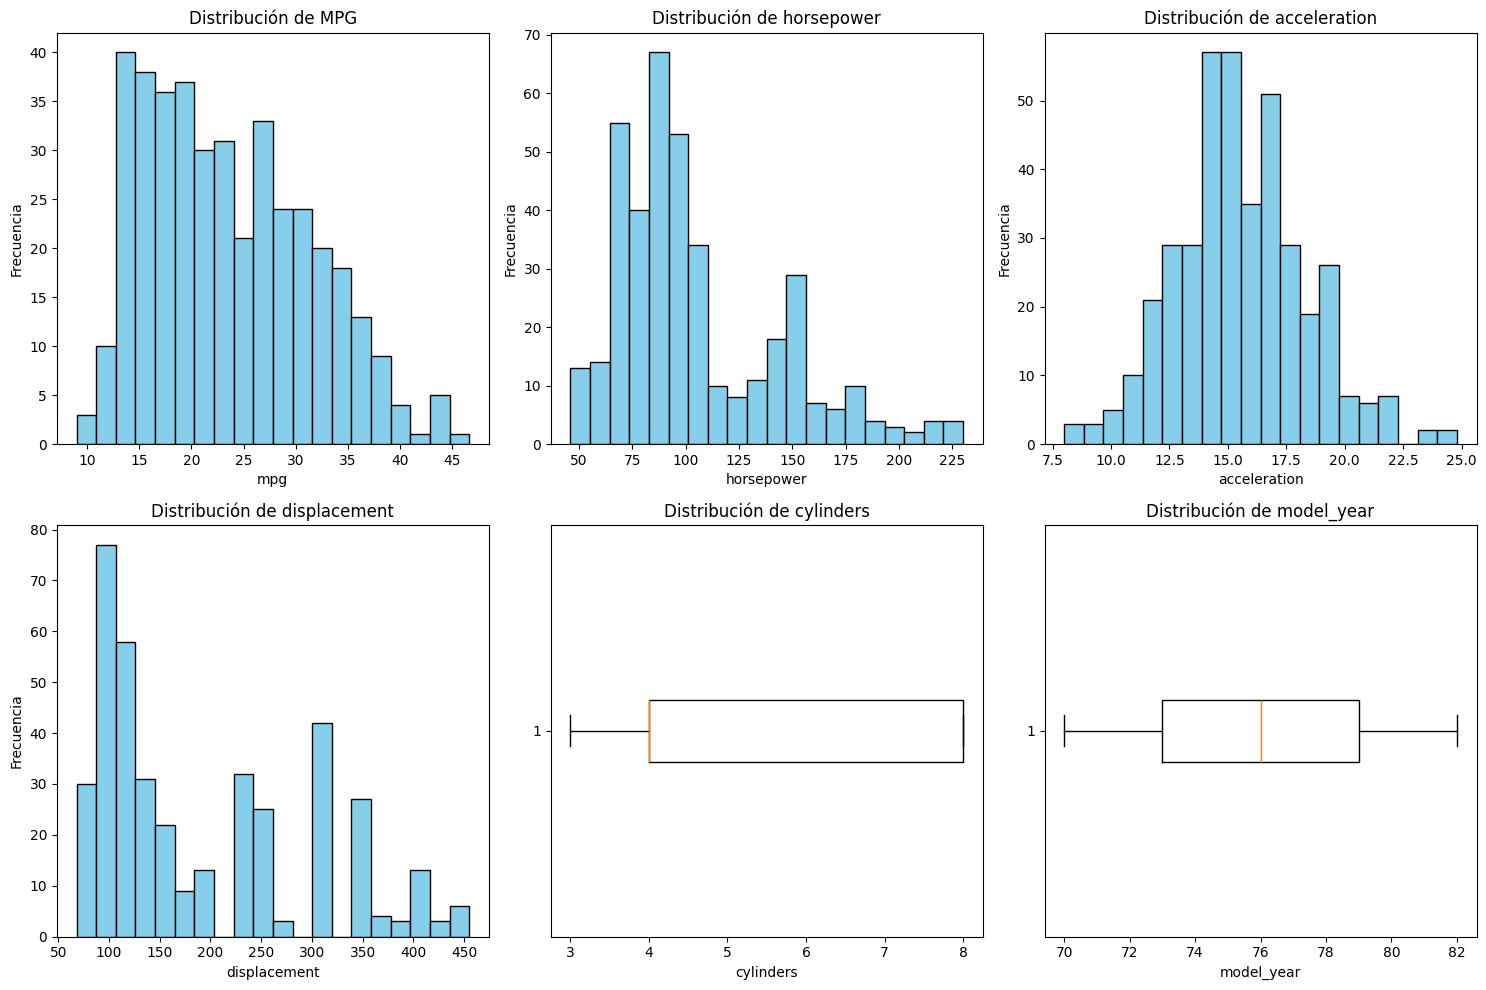

In [17]:
# Graficos de las variables.

variables = ["mpg", "cylinders", "horsepower", "acceleration", "model_year"]

plt.figure(figsize = (15, 10))

# Histogramas

plt.subplot(2, 3, 1)
plt.hist(autos_mpg["mpg"], bins= 20, color = "skyblue", edgecolor ="black")
plt.title("Distribución de MPG")
plt.xlabel("mpg")
plt.ylabel("Frecuencia")

plt.subplot(2, 3, 2)
plt.hist(autos_mpg["horsepower"], bins= 20, color = "skyblue", edgecolor ="black")
plt.title("Distribución de horsepower")
plt.xlabel("horsepower")
plt.ylabel("Frecuencia")

plt.subplot(2, 3, 3)
plt.hist(autos_mpg["acceleration"], bins= 20, color = "skyblue", edgecolor ="black")
plt.title("Distribución de acceleration")
plt.xlabel("acceleration")
plt.ylabel("Frecuencia")

plt.subplot(2, 3, 4)
plt.hist(autos_mpg["displacement"], bins= 20, color = "skyblue", edgecolor ="black")
plt.title("Distribución de displacement")
plt.xlabel("displacement")
plt.ylabel("Frecuencia")

# Boxplots

plt.subplot(2, 3, 5)
plt.boxplot(autos_mpg["cylinders"], vert= False)
plt.title("Distribución de cylinders")
plt.xlabel("cylinders")

plt.subplot(2, 3, 6)
plt.boxplot(autos_mpg["model_year"], vert= False)
plt.title("Distribución de model_year")
plt.xlabel("model_year")

plt.tight_layout()
plt.show()

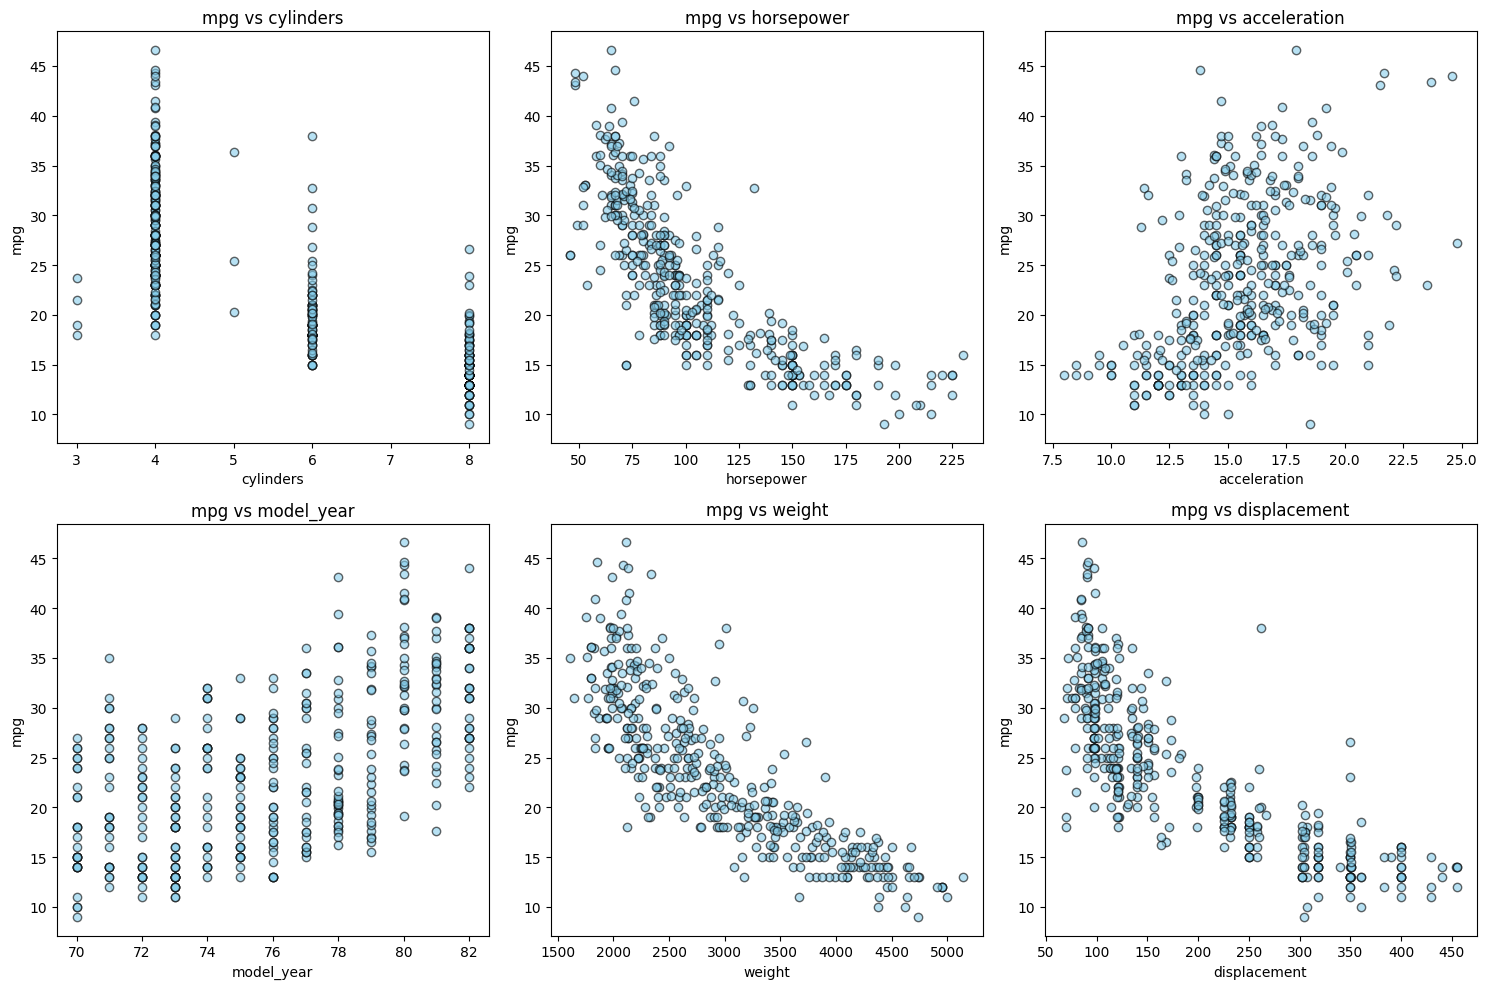

In [18]:
# Graficos de dispersión

variables = ["cylinders", "horsepower", "acceleration", "model_year", "weight", "displacement"]

plt.figure(figsize=(15, 10))

for i, var in enumerate(variables, 1):
    plt.subplot(2, 3, i)
    plt.scatter(autos_mpg[var], autos_mpg["mpg"], alpha=0.6, color="skyblue", edgecolor="black")
    plt.title(f"mpg vs {var}")
    plt.xlabel(var)
    plt.ylabel("mpg")

plt.tight_layout()
plt.show()

## Analisís de la relación entre MPG y el resto de variables.

Las primeras relaciones que se observan es por ejemplo entre MPG (millas por galon de combustible) y WEIGHT (peso del auto). Se observa claramente en el grafico de dispersión como este tiene menores valores a medida que el peso del vehiculo aumenta. Es decir, a mayor pesos menor distancia recorrida por galon de combustible. La misma relación negativa se observa cuando se compara MPG con HORSEPOWER (caballos de fuerza), a medida que la cantidad de HORSERPOWER aumenta, disminuye el MPG. Otra relación interesante es con CYLINDERS (cantidad de cilindros) que aunque es bastante dispar en valores como 4 CILINDROS, donde hay autos que consumen mucho y otros pocos se ve como al ir aumentando la cantidad de CILINDROS el MPG disminuye. Por ultimo cuando se lo compara con ACCELERATION (aceleración) se ve una relación que tiende a ser positiva, que al aumentar la ACELERACIÓN el MPG también aumenta, la aceleración es eficiente con el consumo de combustible.

## 3. **Preprocesamiento**  
   - Limpieza: Manejen missing values (eliminar, imputar) y outliers (si es necesario).  
   - Limpieza: indique cuáles features descarta. Justifique.
   - Indique si usará o no variables categóricas. Justifique. Realice su preprocesamiento adeucado.
   - Escalen las features (p.ej., StandardScaler) para comparar coeficientes después.  
   - Dividan en train/test (70-30 o 80-20).  

## Resolución:

In [19]:
# Valores nulos

autos_mpg.isnull().sum()

,0
mpg,0
cylinders,0
displacement,0
horsepower,6
weight,0
acceleration,0
model_year,0
origin,0
car_name,0


In [20]:
# Elimino los valores nulos encontrados

df_autos = autos_mpg.dropna()

In [21]:
# Descarte de features

autos = df_autos.drop(columns=["origin", "model_year"])
autos.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,ford torino


Decidi eliminar la columna "origin" y "model_year" ya que eran unas columnas de valores enteros que no aportaban valor al analisis. A la columna "car_name" la conserve para posible uso en el analisis final.

no utilizare variables categoricas por que lo que busco analizar es la implicancia de las variables en el valor de MPG y esta es una variable numerica continúa.

In [22]:
# Escalado de los features

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

# Seleccion de features y variable objetivo
X = autos[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration']]
y = autos['mpg']

# Escalamiento con StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns= X.columns)

# Entrenamiento del modelo
model = LinearRegression()
model.fit(X_scaled, y)

# Comparación de coeficientes
coef_autos = pd.DataFrame({
    'features': X_scaled.columns,
    'coef': model.coef_
})

print(coef_autos)

       features      coef
0     cylinders -0.677913
1  displacement -0.008688
2    horsepower -1.739774
3        weight -4.400158
4  acceleration -0.080193


In [23]:
# Creación del test

from sklearn.model_selection import train_test_split

X = autos[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration']]
y = autos['mpg']

# División del test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size= 0.3, random_state= 42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train_scaled, y_train)

coef_autos = pd.DataFrame({
    'features': X.columns,
    'coef': model.coef_
})
print(coef_autos)

r2_train = model.score(X_train_scaled, y_train)
r2_test = model.score(X_test_scaled, y_test)
print(f"R2 train: {r2_train:.3f}")
print(f"R2 test: {r2_test:.3f}")

       features      coef
0     cylinders -0.470738
1  displacement -0.597713
2    horsepower -2.128388
3        weight -3.956335
4  acceleration -0.152832
R2 train: 0.723
R2 test: 0.649


Al darnos todos los resultados de los coeficintes negativos, esto quiere decir que existe una relación negativa entre todas las variables y MPG. Esto es que todas las variables hacen que cuando estas aumentan el MPG disminuya. Es decir, cualquier cambio que hagamos, ya sea un aumento de HORSEPOWER o de CYLINDERS el MPG (millas por galon) disminuira, recorrera menos millas por galon de combustible. WEIGHT es el que más afecta y ACCELERATION el que menos.




## 4. **Regresión Lineal**  
   - Ajusten un modelo de regresión lineal (usando `sklearn.linear_model.LinearRegression`).  
   - Obtengan:  
     - Coeficientes (pesos) del modelo.  
     - Evaluar métricas en el set de entrenamiento y en el de testeo: **R²**, MSE (error cuadrático medio), MAE.  


In [24]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Vuelvo a definir features y target.
X = autos[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration']]
y = autos['mpg']

# Escalado
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train_scaled, y_train)

coef = pd.DataFrame({
    "features": X.columns,
    "coef": model.coef_
})
print("Coeficientes: ", coef)

y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

print("\nEntrenamiento: ")
print("R2: ", r2_score(y_train, y_train_pred))
print("MSE: ", mean_squared_error(y_train, y_train_pred))
print("MAE: ", mean_absolute_error(y_train, y_train_pred))

print("\nTesteo: ")
print("R2: ", r2_score(y_test, y_test_pred))
print("MSE: ", mean_squared_error(y_test, y_test_pred))
print("MAE: ", mean_absolute_error(y_test, y_test_pred))

Coeficientes:         features      coef
0     cylinders -0.298474
1  displacement -0.695438
2    horsepower -1.869394
3        weight -4.192104
4  acceleration -0.170065

Entrenamiento: 
R2:  0.7166422136497115
MSE:  17.879803779295006
MAE:  3.2187427154016586

Testeo: 
R2:  0.6485312110889081
MSE:  17.939171976631265
MAE:  3.486131803336791


Dado que el R2 de train y el R2 de test tienen poca diferencia se puede determinar que el modelo esta generalizado bastante bien.

El MAE tuvo una minima diferencia entre el train y test, en promedio tomaria un valor de 3,35. Esto significa que el modelo se equivoca en 3,35 MPG.


## 5. **Importancia de Variables**  
   - Analicen los **coeficientes** del modelo:  
     - Valores absolutos altos → mayor impacto en el target.  
     - Signo: Relación positiva/negativa con el target.  
   - Comparen la magnitud de los coeficientes **escalados** (si usaron features en distintas unidades).  
   - **5.1. Opcional**:
     Otra forma es "desordenar" un feature y ver cómo empeora el modelo. Si al desordenarlo el error aumenta mucho, ese feature era importante. Usen métodos como:  
     - **Permutation Importance** (de sklearn) para validar importancia. Más info en https://scikit-learn.org/stable/modules/permutation_importance.html



## Resolución:

## Coeficientes del modelo:

* Los coeficientes del modelo son todos negativos. Por lo tanto hay una relación negativa entre MPG y el resto de variables. Siempre que se aumente una de las variables features MPG disminuira (o tenderá).
* Los features tienen distinta implicancia en esta disminución de MPG. La que mas impacta con diferencia es WEIGHT, el peso del auto tiene mucho impacto en el MPG. luego le sigue HORSEPOWER todavía con bastante impacto, el resto de variables presentan un impacto bastante menor, siendo el tercero que mas influye DISPLACEMENT, luego CYLINDERS y por ultimo ACCELERATION siendo la que menos impacta y dando un valor cercano a 0.

In [28]:
# Comparación de coeficientes.

fig = px.bar(
    coef,
    x = "features",
    y = "coef",
    title = "Implicancia de cada coeficiente escalado",
    text = "coef",
    color = "coef",
    color_continuous_scale = "RdBu"
)

fig.update_traces(texttemplate= '%{text: .2f}', textposition= "outside")
fig.update_layout(yaxis_title = "Coeficiente escalado", xaxis_title = "Variable")

fig.show()


## 6. **Reflexión**  
   - ¿Cuáles variables son más importantes según el modelo? ¿Coincide con su análisis exploratorio?  
   - ¿El modelo tiene buen rendimiento (R² alto, MSE bajo)? Si no, ¿a qué podría deberse?  



## Resolución:

* Las variables mas importantes del modelo son WEIGHT y HORSEPOWER por que son las 2 mas influyentes con diferencia en el valor final de MPG. Son las dos variables con mayor coeficiente del modelo. Esto quiere decir que pequeñas modificaciones en una de esas variables puede afectar mucho al valor de MPG.

* En el analisis exploratorio ya se podía observar en el grafico de dispersión esta fuerte relación negativa de estas variables con MPG. Así que en principio coincidio el analisis exploratorio con el resultado del modelo. Exceptuando un caso, el de ACCELERATION, en el analisis exploratorio parecía haber una relación positiva entre esta variable y MPG, cosa que luego el modelo reflejo no ser así. El modelo otorgo un coeficiente negativo, esto indica que también existe una relación negativa, pero una muy pequeña, la cual no había sido posible ver en el grafico de dispersión.

* Si, el modelo tiene un buen rendimiento.
Tiene un R2 de 0,717 en train y de 0,649 en test. Son 2 valores altos que indican que el modelo generaliza bastante bien y como no hay una gran diferencia entre sus valores se puede decir que tampoco hay sobreajuste.
El MSE dio un valor de ~17,9 el cual es un valor bajo, pero no tanto, es un error medio.
Además el train dio un valor de 17,88 y el test de 17,94. Estos valores tan similares nos indican que no hay fuga de performance.


## **Bonus**:  
- Prueben eliminar variables "poco importantes" y reentrenar el modelo. ¿Mejora el rendimiento?  


---

### **Tips**:  
- Si el R² es muy bajo, revisen si hay relaciones no lineales (y consideren transformar features).  
- Documenten cada paso: ¡la trazabilidad es clave en ciencia de datos!  
